Scan Started: E:\HOME\RetroVault\TOSEC_DATs\Extracted\TOSEC-v2025-03-13
   Target Extensions: ['.dat', '.xml']
Total files/folders scanned: 11193
Analysis Complete. Relevant files found: 4743

DEPONES LABS - DATA DISTRIBUTION REPORT
Analysis Path    : E:\HOME\RetroVault\TOSEC_DATs\Extracted\TOSEC-v2025-03-13
Total Files      : 4743
Max File Size    : 18.11 MB (Commodore C64 - Demos - [D64] (TOSEC-v2025-01-07_CM).dat)
Mean File Size   : 0.08 MB
--------------------------------------------------
ARCHITECTURE VALIDATION (Threshold: 100 MB)
--------------------------------------------------
In-Memory Safe (<100MB) : 4743 files (100.00%)
Streaming Required (>100MB): 0 files (0.00%)
CONCLUSION: The 100 MB threshold is VALID.
   The architecture is optimized for 95%+ of use cases.
   Streaming Mode is only required for 0.00% of the dataset.


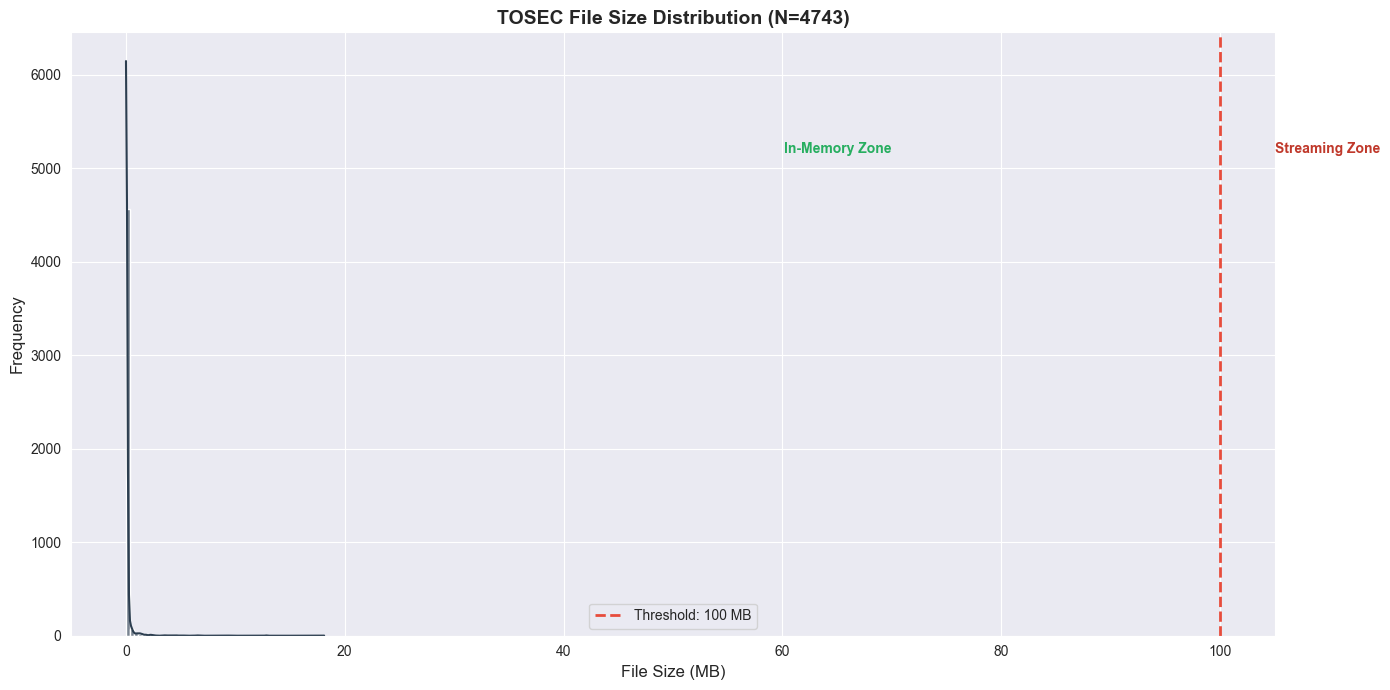

In [4]:
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# SETTINGS (LAB CONFIGURATION)
# ==========================================
# Enter the root path of the TOSEC/DAT archive to be analyzed.
# Example Windows: r"D:\Emulation\TOSEC"
# Example Linux/Mac: "/home/user/tosec_archive"
ROOT_DIR = r"E:\HOME\RetroVault\TOSEC_DATs\Extracted\TOSEC-v2025-03-13"     # r"C:\Path\To\Your\TOSEC\Archive" 

# Architectural threshold to validate (in MB)
THRESHOLD_MB = 100 

def scan_file_sizes(root_path, extensions=[".dat", ".xml"]):
    """
    Scans files in the specified directory recursively and creates a size inventory.
    """
    file_data = []
    root = pathlib.Path(root_path)
    
    print(f"Scan Started: {root_path}")
    print(f"   Target Extensions: {extensions}")
    
    # Recursively scan the entire directory tree
    all_files = list(root.rglob("*"))
    print(f"Total files/folders scanned: {len(all_files)}")
    
    analyzed_count = 0
    
    for file_path in all_files:
        if file_path.is_file() and file_path.suffix.lower() in extensions:
            try:
                # Convert size: Bytes -> MB
                size_mb = file_path.stat().st_size / (1024 * 1024)
                
                file_data.append({
                    "filename": file_path.name,
                    "path": str(file_path),
                    "size_mb": size_mb
                })
                analyzed_count += 1
            except Exception as e:
                print(f"Access Error: {file_path.name} - {e}")

    print(f"Analysis Complete. Relevant files found: {analyzed_count}")
    return pd.DataFrame(file_data)

# ==========================================
# ANALYSIS ENGINE
# ==========================================

# 1. Collect Data
df = scan_file_sizes(ROOT_DIR, extensions=[".dat", ".xml"])

if not df.empty:
    # 2. Calculate Statistics
    total_files = len(df)
    files_above_threshold = df[df["size_mb"] > THRESHOLD_MB]
    count_above = len(files_above_threshold)
    percent_above = (count_above / total_files) * 100
    percent_in_memory = 100 - percent_above
    
    max_file = df.loc[df["size_mb"].idxmax()]
    
    # 3. Print Report (Depones Labs Standard)
    print("\n" + "="*50)
    print(f"DEPONES LABS - DATA DISTRIBUTION REPORT")
    print("="*50)
    print(f"Analysis Path    : {ROOT_DIR}")
    print(f"Total Files      : {total_files}")
    print(f"Max File Size    : {max_file['size_mb']:.2f} MB ({max_file['filename']})")
    print(f"Mean File Size   : {df['size_mb'].mean():.2f} MB")
    print("-" * 50)
    print(f"ARCHITECTURE VALIDATION (Threshold: {THRESHOLD_MB} MB)")
    print("-" * 50)
    print(f"In-Memory Safe (<{THRESHOLD_MB}MB) : {total_files - count_above} files ({percent_in_memory:.2f}%)")
    print(f"Streaming Required (>{THRESHOLD_MB}MB): {count_above} files ({percent_above:.2f}%)")
    print("="*50)
    
    # 4. Scientific Conclusion
    if percent_above < 5:
        print(f"CONCLUSION: The {THRESHOLD_MB} MB threshold is VALID.")
        print(f"   The architecture is optimized for 95%+ of use cases.")
        print(f"   Streaming Mode is only required for {percent_above:.2f}% of the dataset.")
    else:
        print(f"WARNING: High volume of large files detected ({percent_above:.2f}%).")
        print(f"   Consider lowering the threshold or optimizing the Streaming Mode further.")

    # 5. Visualization (Proof of Concept)
    plt.figure(figsize=(14, 7))
    sns.set_style("darkgrid")
    
    # Histogram
    sns.histplot(df["size_mb"], bins=50, color="#2c3e50", kde=True, alpha=0.6)
    
    # Threshold Line
    plt.axvline(THRESHOLD_MB, color='#e74c3c', linestyle='--', linewidth=2, label=f'Threshold: {THRESHOLD_MB} MB')
    
    # Zone Annotation
    plt.text(THRESHOLD_MB + 5, plt.ylim()[1]*0.8, 'Streaming Zone', color='#c0392b', fontweight='bold')
    plt.text(THRESHOLD_MB - 30, plt.ylim()[1]*0.8, 'In-Memory Zone', color='#27ae60', fontweight='bold', ha='right')

    plt.title(f"TOSEC File Size Distribution (N={total_files})", fontsize=14, fontweight='bold')
    plt.xlabel("File Size (MB)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

else:
    print("ERROR: No .dat or .xml files found. Please check the ROOT_DIR path.")